In [203]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional

In [3]:
df = pd.read_csv('pharma/salesdaily.csv')

### Preparing data 

In [4]:
def prepare_data(timeseries_data, n_features):
    x, y =[],[]
    for i in range(len(timeseries_data)):

        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

## M01AB

In [195]:
data = df.loc[:,['M01AB']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [196]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)

In [197]:
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

### Stacked LSTM Model

##### Lstm model with 2 hidden layers and 1 output layer 

In [219]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 5ms/step - loss: 16.3531
Epoch 2/300
66/66 [==============================] - 0s 5ms/step - loss: 8.4099
Epoch 3/300
66/66 [==============================] - 0s 5ms/step - loss: 7.6258
Epoch 4/300
66/66 [==============================] - 0s 5ms/step - loss: 7.5521
Epoch 5/300
66/66 [==============================] - 0s 5ms/step - loss: 7.5113
Epoch 6/300
66/66 [==============================] - 0s 5ms/step - loss: 7.4635
Epoch 7/300
66/66 [==============================] - 0s 5ms/step - loss: 7.5010
Epoch 8/300
66/66 [==============================] - 0s 5ms/step - loss: 7.4971
Epoch 9/300
66/66 [==============================] - 0s 5ms/step - loss: 7.4301
Epoch 10/300
66/66 [==============================] - 0s 5ms/step - loss: 7.4985
Epoch 11/300
66/66 [==============================] - 0s 5ms/step - loss: 7.5322
Epoch 12/300
66/66 [==============================] - 0s 5ms/step - loss: 7.4570
Epoch 13/300
66/66 [================

66/66 [==============================] - 0s 5ms/step - loss: 6.7494
Epoch 201/300
66/66 [==============================] - 0s 5ms/step - loss: 6.7378
Epoch 202/300
66/66 [==============================] - 0s 4ms/step - loss: 6.7633
Epoch 203/300
66/66 [==============================] - 0s 4ms/step - loss: 6.7317
Epoch 204/300
66/66 [==============================] - 0s 4ms/step - loss: 6.7484
Epoch 205/300
66/66 [==============================] - 0s 4ms/step - loss: 6.7210
Epoch 206/300
66/66 [==============================] - 0s 4ms/step - loss: 6.6928
Epoch 207/300
66/66 [==============================] - 0s 4ms/step - loss: 6.7263
Epoch 208/300
66/66 [==============================] - 0s 4ms/step - loss: 6.6984
Epoch 209/300
66/66 [==============================] - 0s 5ms/step - loss: 6.6645
Epoch 210/300
66/66 [==============================] - 0s 4ms/step - loss: 6.6639
Epoch 211/300
66/66 [==============================] - 0s 4ms/step - loss: 6.6462
Epoch 212/300
66/66 [=========

### Predictions

In [220]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[4.896292, 4.3413033, 3.9272237, 4.6913223, 4.7886257, 4.55038, 4.6916237]


### Plotting Predictions

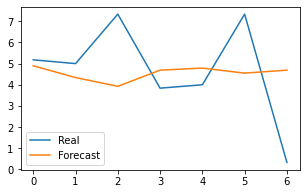

In [221]:

fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

### LSTM RMSE

In [222]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

2.399816465110116


### BiDirectional LSTM Model

In [204]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
66/66 [==============================] - 3s 4ms/step - loss: 15.0265
Epoch 2/500
66/66 [==============================] - 0s 3ms/step - loss: 8.4795
Epoch 3/500
66/66 [==============================] - 0s 3ms/step - loss: 7.6377
Epoch 4/500
66/66 [==============================] - 0s 3ms/step - loss: 7.5375
Epoch 5/500
66/66 [==============================] - 0s 3ms/step - loss: 7.5075
Epoch 6/500
66/66 [==============================] - 0s 3ms/step - loss: 7.5934
Epoch 7/500
66/66 [==============================] - 0s 3ms/step - loss: 7.5025
Epoch 8/500
66/66 [==============================] - 0s 3ms/step - loss: 7.5033
Epoch 9/500
66/66 [==============================] - 0s 3ms/step - loss: 7.4739
Epoch 10/500
66/66 [==============================] - 0s 3ms/step - loss: 7.4983
Epoch 11/500
66/66 [==============================] - 0s 3ms/step - loss: 7.4933
Epoch 12/500
66/66 [==============================] - 0s 3ms/step - loss: 7.4892
Epoch 13/500
66/66 [================

66/66 [==============================] - 0s 6ms/step - loss: 6.6109
Epoch 201/500
66/66 [==============================] - 0s 5ms/step - loss: 6.6299
Epoch 202/500
66/66 [==============================] - 0s 5ms/step - loss: 6.6045
Epoch 203/500
66/66 [==============================] - 0s 5ms/step - loss: 6.5917
Epoch 204/500
66/66 [==============================] - 0s 4ms/step - loss: 6.5178
Epoch 205/500
66/66 [==============================] - 0s 3ms/step - loss: 6.5054
Epoch 206/500
66/66 [==============================] - 0s 3ms/step - loss: 6.5352
Epoch 207/500
66/66 [==============================] - 0s 3ms/step - loss: 6.5282
Epoch 208/500
66/66 [==============================] - 0s 3ms/step - loss: 6.4829
Epoch 209/500
66/66 [==============================] - 0s 3ms/step - loss: 6.4837
Epoch 210/500
66/66 [==============================] - 0s 3ms/step - loss: 6.5075
Epoch 211/500
66/66 [==============================] - 0s 3ms/step - loss: 6.4545
Epoch 212/500
66/66 [=========

66/66 [==============================] - 0s 3ms/step - loss: 4.1317
Epoch 400/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0813
Epoch 401/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0832
Epoch 402/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0289
Epoch 403/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0570
Epoch 404/500
66/66 [==============================] - 0s 3ms/step - loss: 4.2052
Epoch 405/500
66/66 [==============================] - 0s 3ms/step - loss: 4.1169
Epoch 406/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0339
Epoch 407/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0351
Epoch 408/500
66/66 [==============================] - 0s 3ms/step - loss: 3.9170
Epoch 409/500
66/66 [==============================] - 0s 3ms/step - loss: 3.9798
Epoch 410/500
66/66 [==============================] - 0s 3ms/step - loss: 4.0420
Epoch 411/500
66/66 [=========

### Predictions

In [210]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[5.744903, 4.04808, 6.204003, 5.626043, 3.8106973, 5.717075, 2.516436]


### BiDirection LSTM RMSE

In [211]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

### Plotting Predictions

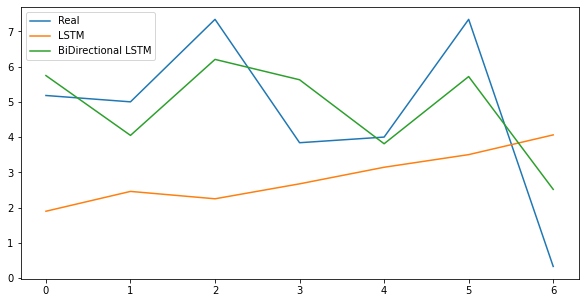

In [213]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lst_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

### Performance Metrics

In [214]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  2.2710053267651165
BiDirectional RMSE :  1.3709188832387489


## M01AE

In [223]:
data = df.loc[:,['M01AE']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [224]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [225]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 5ms/step - loss: 10.1117
Epoch 2/300
66/66 [==============================] - 0s 4ms/step - loss: 5.2556
Epoch 3/300
66/66 [==============================] - 0s 4ms/step - loss: 4.6440
Epoch 4/300
66/66 [==============================] - 0s 4ms/step - loss: 4.5225
Epoch 5/300
66/66 [==============================] - 0s 5ms/step - loss: 4.5289
Epoch 6/300
66/66 [==============================] - 0s 4ms/step - loss: 4.5010
Epoch 7/300
66/66 [==============================] - 0s 4ms/step - loss: 4.5166
Epoch 8/300
66/66 [==============================] - 0s 5ms/step - loss: 4.5638
Epoch 9/300
66/66 [==============================] - 0s 4ms/step - loss: 4.5009
Epoch 10/300
66/66 [==============================] - 0s 5ms/step - loss: 4.4446
Epoch 11/300
66/66 [==============================] - 0s 4ms/step - loss: 4.4536
Epoch 12/300
66/66 [==============================] - 0s 4ms/step - loss: 4.4572
Epoch 13/300
66/66 [================

66/66 [==============================] - 0s 4ms/step - loss: 4.3686
Epoch 103/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3689
Epoch 104/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3374
Epoch 105/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3856
Epoch 106/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3787
Epoch 107/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3587
Epoch 108/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3371
Epoch 109/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3315
Epoch 110/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3475
Epoch 111/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3221
Epoch 112/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3346
Epoch 113/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3257
Epoch 114/300
66/66 [=========

66/66 [==============================] - 0s 4ms/step - loss: 4.1605
Epoch 203/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1251
Epoch 204/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1398
Epoch 205/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1689
Epoch 206/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1161
Epoch 207/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1173
Epoch 208/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1071
Epoch 209/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1171
Epoch 210/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1255
Epoch 211/300
66/66 [==============================] - 0s 4ms/step - loss: 4.1355
Epoch 212/300
66/66 [==============================] - 0s 4ms/step - loss: 4.0970
Epoch 213/300
66/66 [==============================] - 0s 4ms/step - loss: 4.0938
Epoch 214/300
66/66 [=========

In [226]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[3.273233, 3.4893317, 3.6098132, 4.247029, 3.542204, 4.1655645, 3.9896717]


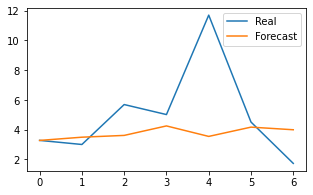

In [227]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [228]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

3.310782173865116


In [241]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 3ms/step - loss: 9.4340
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 4.9481
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 4.6192
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 4.5451
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 4.5337
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 4.5267
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 4.4998
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 4.4664
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 4.4909
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 4.4748
Epoch 11/300
66/66 [==============================] - 0s 3ms/step - loss: 4.4728
Epoch 12/300
66/66 [==============================] - 0s 3ms/step - loss: 4.4829
Epoch 13/300
66/66 [=================

66/66 [==============================] - 0s 3ms/step - loss: 3.9714
Epoch 202/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9576
Epoch 203/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9582
Epoch 204/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9454
Epoch 205/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9644
Epoch 206/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9501
Epoch 207/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9479
Epoch 208/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9221
Epoch 209/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9420
Epoch 210/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9192
Epoch 211/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9334
Epoch 212/300
66/66 [==============================] - 0s 3ms/step - loss: 3.9173
Epoch 213/300
66/66 [=========

In [235]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[4.07551, 2.611899, 4.056623, 4.1472216, 3.8040135, 3.4736369, 3.7971458]


In [236]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

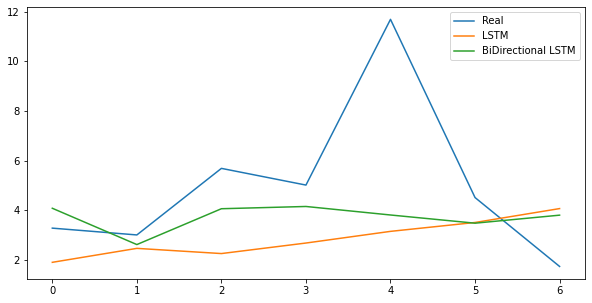

In [237]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lst_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [238]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  3.310782173865116
BiDirectional RMSE :  3.2007196545214103


## N02BA

In [242]:
data = df.loc[:,['N02BA']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [243]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [244]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 5ms/step - loss: 10.4775
Epoch 2/300
66/66 [==============================] - 0s 5ms/step - loss: 5.9946
Epoch 3/300
66/66 [==============================] - 0s 5ms/step - loss: 5.7127
Epoch 4/300
66/66 [==============================] - 0s 5ms/step - loss: 5.6164
Epoch 5/300
66/66 [==============================] - 0s 4ms/step - loss: 5.6262
Epoch 6/300
66/66 [==============================] - 0s 4ms/step - loss: 5.5953
Epoch 7/300
66/66 [==============================] - 0s 4ms/step - loss: 5.5655
Epoch 8/300
66/66 [==============================] - 0s 4ms/step - loss: 5.5370
Epoch 9/300
66/66 [==============================] - 0s 5ms/step - loss: 5.5256
Epoch 10/300
66/66 [==============================] - 0s 5ms/step - loss: 5.5553
Epoch 11/300
66/66 [==============================] - 0s 5ms/step - loss: 5.5388
Epoch 12/300
66/66 [==============================] - 0s 4ms/step - loss: 5.5392
Epoch 13/300
66/66 [================

66/66 [==============================] - 0s 5ms/step - loss: 4.3570
Epoch 202/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3677
Epoch 203/300
66/66 [==============================] - 0s 4ms/step - loss: 4.4131
Epoch 204/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3633
Epoch 205/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3470
Epoch 206/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3076
Epoch 207/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3238
Epoch 208/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3450
Epoch 209/300
66/66 [==============================] - 0s 5ms/step - loss: 4.2666
Epoch 210/300
66/66 [==============================] - 0s 5ms/step - loss: 4.2925
Epoch 211/300
66/66 [==============================] - 0s 5ms/step - loss: 4.2176
Epoch 212/300
66/66 [==============================] - 0s 5ms/step - loss: 4.2520
Epoch 213/300
66/66 [=========

In [245]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[3.1257017, 2.7252767, 3.8511136, 3.6603177, 3.6888359, 3.765208, 3.5608985]


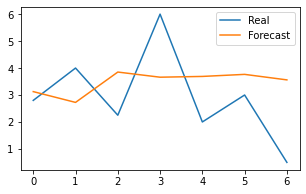

In [264]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [247]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

1.795847943916015


In [258]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 3ms/step - loss: 11.5744
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 6.2239
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 5.6815
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5780
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5314
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5608
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5279
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5434
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5526
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5825
Epoch 11/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5120
Epoch 12/300
66/66 [==============================] - 0s 3ms/step - loss: 5.5193
Epoch 13/300
66/66 [================

66/66 [==============================] - 0s 3ms/step - loss: 4.7821
Epoch 202/300
66/66 [==============================] - 0s 3ms/step - loss: 4.8244
Epoch 203/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7907
Epoch 204/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7665
Epoch 205/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7948
Epoch 206/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7926
Epoch 207/300
66/66 [==============================] - 0s 3ms/step - loss: 4.8180
Epoch 208/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7488
Epoch 209/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7706
Epoch 210/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7913
Epoch 211/300
66/66 [==============================] - 0s 3ms/step - loss: 4.6991
Epoch 212/300
66/66 [==============================] - 0s 3ms/step - loss: 4.7364
Epoch 213/300
66/66 [=========

In [259]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[2.8993506, 2.9335427, 3.4401507, 3.627459, 3.713245, 3.5875003, 3.3377285]


In [260]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

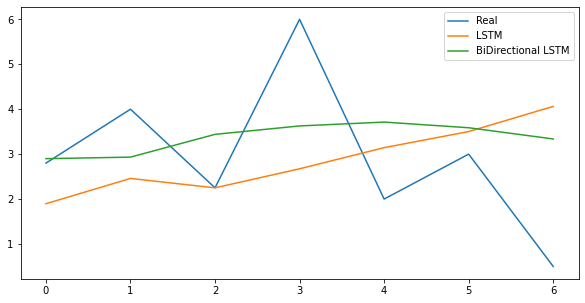

In [261]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lst_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [262]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  1.795847943916015
BiDirectional RMSE :  1.6701445115783327


## N02BE

In [265]:
data = df.loc[:,['N02BE']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [266]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [272]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=250, verbose=1)

Epoch 1/250
66/66 [==============================] - 2s 5ms/step - loss: 310.1410
Epoch 2/250
66/66 [==============================] - 0s 4ms/step - loss: 172.8164
Epoch 3/250
66/66 [==============================] - 0s 5ms/step - loss: 173.3636
Epoch 4/250
66/66 [==============================] - 0s 4ms/step - loss: 171.6406
Epoch 5/250
66/66 [==============================] - 0s 5ms/step - loss: 169.0022
Epoch 6/250
66/66 [==============================] - 0s 4ms/step - loss: 168.4631
Epoch 7/250
66/66 [==============================] - 0s 5ms/step - loss: 168.0524
Epoch 8/250
66/66 [==============================] - 0s 5ms/step - loss: 170.0995
Epoch 9/250
66/66 [==============================] - 0s 4ms/step - loss: 165.8945
Epoch 10/250
66/66 [==============================] - ETA: 0s - loss: 170.533 - 0s 5ms/step - loss: 168.7010
Epoch 11/250
66/66 [==============================] - 0s 5ms/step - loss: 172.0672
Epoch 12/250
66/66 [==============================] - 0s 5ms/step - lo

Epoch 197/250
66/66 [==============================] - 0s 5ms/step - loss: 88.5965
Epoch 198/250
66/66 [==============================] - 0s 5ms/step - loss: 83.3193
Epoch 199/250
66/66 [==============================] - 0s 5ms/step - loss: 87.8932
Epoch 200/250
66/66 [==============================] - 0s 5ms/step - loss: 83.1381
Epoch 201/250
66/66 [==============================] - 0s 5ms/step - loss: 86.2033
Epoch 202/250
66/66 [==============================] - 0s 5ms/step - loss: 89.2015
Epoch 203/250
66/66 [==============================] - 0s 5ms/step - loss: 115.7713
Epoch 204/250
66/66 [==============================] - 0s 5ms/step - loss: 92.9733
Epoch 205/250
66/66 [==============================] - 0s 5ms/step - loss: 88.5901
Epoch 206/250
66/66 [==============================] - 0s 5ms/step - loss: 83.9129
Epoch 207/250
66/66 [==============================] - 0s 5ms/step - loss: 83.9087
Epoch 208/250
66/66 [==============================] - 0s 5ms/step - loss: 86.5317
Epo

In [273]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[44.407516, 25.09716, 37.76449, 35.61611, 29.009165, 25.878044, 21.719572]


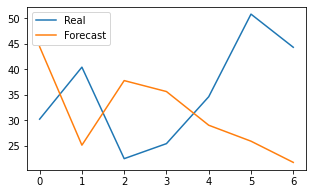

In [274]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [275]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

16.635461105079127


In [276]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 3ms/step - loss: 284.2701
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 171.1217
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 168.9387
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 169.3240
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 166.7965
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 165.9413
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 168.3028
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 164.4478
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 164.5301
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 165.1344
Epoch 11/300
66/66 [==============================] - 0s 3ms/step - loss: 164.2531
Epoch 12/300
66/66 [==============================] - 0s 3ms/step - loss: 163.5486
Epoch 13/300


66/66 [==============================] - 0s 3ms/step - loss: 76.7148
Epoch 198/300
66/66 [==============================] - 0s 3ms/step - loss: 79.0451
Epoch 199/300
66/66 [==============================] - 0s 3ms/step - loss: 76.8776
Epoch 200/300
66/66 [==============================] - 0s 3ms/step - loss: 73.2824
Epoch 201/300
66/66 [==============================] - 0s 3ms/step - loss: 71.7834
Epoch 202/300
66/66 [==============================] - 0s 3ms/step - loss: 73.4221
Epoch 203/300
66/66 [==============================] - 0s 3ms/step - loss: 74.4055
Epoch 204/300
66/66 [==============================] - 0s 3ms/step - loss: 71.4217
Epoch 205/300
66/66 [==============================] - 0s 3ms/step - loss: 68.0146
Epoch 206/300
66/66 [==============================] - 0s 3ms/step - loss: 67.6310
Epoch 207/300
66/66 [==============================] - 0s 3ms/step - loss: 69.9679
Epoch 208/300
66/66 [==============================] - 0s 3ms/step - loss: 67.1259
Epoch 209/300
66/6

In [277]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[41.62492, 27.635794, 41.917664, 19.528797, 17.148329, 33.25702, 32.799583]


In [278]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

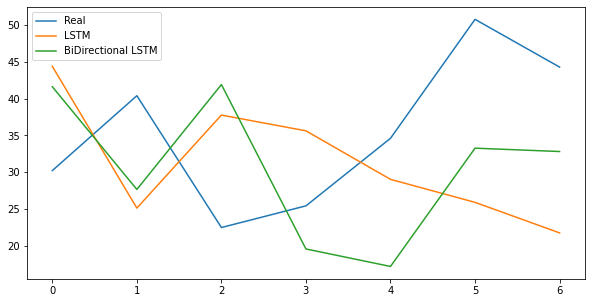

In [280]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [281]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  16.635461105079127
BiDirectional RMSE :  14.399857616651648


## N05B

In [282]:
data = df.loc[:,['N05B']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [283]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [284]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=280, verbose=1)

Epoch 1/280
66/66 [==============================] - 3s 5ms/step - loss: 62.7964
Epoch 2/280
66/66 [==============================] - 0s 4ms/step - loss: 30.0893
Epoch 3/280
66/66 [==============================] - 0s 4ms/step - loss: 28.6363
Epoch 4/280
66/66 [==============================] - 0s 4ms/step - loss: 28.6242
Epoch 5/280
66/66 [==============================] - 0s 4ms/step - loss: 28.2943
Epoch 6/280
66/66 [==============================] - 0s 4ms/step - loss: 27.9674
Epoch 7/280
66/66 [==============================] - 0s 4ms/step - loss: 27.8840
Epoch 8/280
66/66 [==============================] - 0s 4ms/step - loss: 27.7834
Epoch 9/280
66/66 [==============================] - 0s 4ms/step - loss: 27.7518
Epoch 10/280
66/66 [==============================] - 0s 5ms/step - loss: 27.8613
Epoch 11/280
66/66 [==============================] - 0s 5ms/step - loss: 27.8380
Epoch 12/280
66/66 [==============================] - 0s 5ms/step - loss: 27.9095
Epoch 13/280
66/66 [=====

66/66 [==============================] - 0s 4ms/step - loss: 24.0369
Epoch 102/280
66/66 [==============================] - 0s 5ms/step - loss: 24.9225
Epoch 103/280
66/66 [==============================] - 0s 5ms/step - loss: 24.0527
Epoch 104/280
66/66 [==============================] - 0s 4ms/step - loss: 23.9977
Epoch 105/280
66/66 [==============================] - 0s 5ms/step - loss: 23.4253
Epoch 106/280
66/66 [==============================] - 0s 5ms/step - loss: 23.5692
Epoch 107/280
66/66 [==============================] - 0s 5ms/step - loss: 23.5004
Epoch 108/280
66/66 [==============================] - 0s 4ms/step - loss: 23.1014
Epoch 109/280
66/66 [==============================] - 0s 5ms/step - loss: 22.9564
Epoch 110/280
66/66 [==============================] - 0s 5ms/step - loss: 22.7708
Epoch 111/280
66/66 [==============================] - 0s 5ms/step - loss: 22.6918
Epoch 112/280
66/66 [==============================] - 0s 4ms/step - loss: 22.7421
Epoch 113/280
66/6

In [285]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[14.401621, 8.789387, 13.696684, 9.153677, 10.997879, 8.432243, 5.118187]


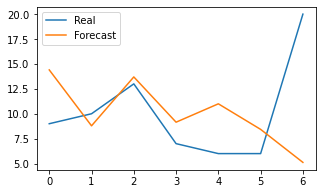

In [286]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [287]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

6.415714496717939


In [288]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 6s 3ms/step - loss: 53.4999
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 29.7595
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 29.0076
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 28.4849
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 28.2658
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 27.9503
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 28.0596
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 27.9346
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 28.5008
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 28.1199
Epoch 11/300
66/66 [==============================] - 0s 3ms/step - loss: 27.9064
Epoch 12/300
66/66 [==============================] - 0s 3ms/step - loss: 27.8335
Epoch 13/300
66/66 [=====

66/66 [==============================] - 0s 3ms/step - loss: 17.0120
Epoch 199/300
66/66 [==============================] - 0s 3ms/step - loss: 16.4976
Epoch 200/300
66/66 [==============================] - 0s 3ms/step - loss: 16.2928
Epoch 201/300
66/66 [==============================] - 0s 3ms/step - loss: 16.1648
Epoch 202/300
66/66 [==============================] - 0s 3ms/step - loss: 16.2456
Epoch 203/300
66/66 [==============================] - 0s 3ms/step - loss: 16.7305
Epoch 204/300
66/66 [==============================] - 0s 3ms/step - loss: 16.3726
Epoch 205/300
66/66 [==============================] - 0s 3ms/step - loss: 16.0231
Epoch 206/300
66/66 [==============================] - 0s 3ms/step - loss: 16.0492
Epoch 207/300
66/66 [==============================] - 0s 3ms/step - loss: 15.9602
Epoch 208/300
66/66 [==============================] - 0s 3ms/step - loss: 15.2691
Epoch 209/300
66/66 [==============================] - 0s 3ms/step - loss: 15.5936
Epoch 210/300
66/6

In [289]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[9.609769, 7.838871, 10.355302, 8.590375, 8.258855, 9.435811, 8.524831]


In [290]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

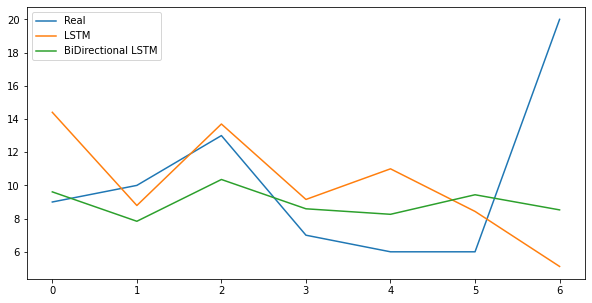

In [291]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [292]:

print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  6.415714496717939
BiDirectional RMSE :  4.8277878390811715


## N05C

In [293]:
data = df.loc[:,['N05C']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [294]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [295]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 5ms/step - loss: 1.3394
Epoch 2/300
66/66 [==============================] - 0s 4ms/step - loss: 1.2121
Epoch 3/300
66/66 [==============================] - 0s 5ms/step - loss: 1.2003
Epoch 4/300
66/66 [==============================] - 0s 5ms/step - loss: 1.2024
Epoch 5/300
66/66 [==============================] - 0s 5ms/step - loss: 1.1977
Epoch 6/300
66/66 [==============================] - 0s 4ms/step - loss: 1.1985A: 0s - loss: 1.2
Epoch 7/300
66/66 [==============================] - 0s 4ms/step - loss: 1.1975
Epoch 8/300
66/66 [==============================] - 0s 4ms/step - loss: 1.1987
Epoch 9/300
66/66 [==============================] - 0s 5ms/step - loss: 1.1966
Epoch 10/300
66/66 [==============================] - 0s 4ms/step - loss: 1.1970
Epoch 11/300
66/66 [==============================] - 0s 5ms/step - loss: 1.1958
Epoch 12/300
66/66 [==============================] - 0s 5ms/step - loss: 1.1967
Epoch 13/300
66/66 [

66/66 [==============================] - 0s 4ms/step - loss: 1.0737
Epoch 202/300
66/66 [==============================] - 0s 5ms/step - loss: 1.0817
Epoch 203/300
66/66 [==============================] - 0s 4ms/step - loss: 1.0790
Epoch 204/300
66/66 [==============================] - 0s 5ms/step - loss: 1.0742
Epoch 205/300
66/66 [==============================] - 0s 5ms/step - loss: 1.0740
Epoch 206/300
66/66 [==============================] - 0s 4ms/step - loss: 1.0776
Epoch 207/300
66/66 [==============================] - 0s 5ms/step - loss: 1.0974
Epoch 208/300
66/66 [==============================] - 0s 4ms/step - loss: 1.0734
Epoch 209/300
66/66 [==============================] - 0s 4ms/step - loss: 1.0696
Epoch 210/300
66/66 [==============================] - 0s 4ms/step - loss: 1.0631
Epoch 211/300
66/66 [==============================] - 0s 5ms/step - loss: 1.0681
Epoch 212/300
66/66 [==============================] - 0s 4ms/step - loss: 1.0680
Epoch 213/300
66/66 [=========

In [296]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[0.54616904, 0.5661587, 0.6153117, 0.5952268, 0.5775432, 0.3948397, 0.3671492]


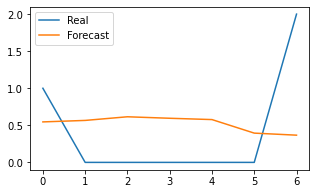

In [297]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [298]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

0.7941804332787579


In [299]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 3ms/step - loss: 1.3074
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 1.2088
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 1.2007
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1998
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1991
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1999
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1942
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1942
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1928
Epoch 11/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 12/300
66/66 [==============================] - 0s 3ms/step - loss: 1.1939
Epoch 13/300
66/66 [=================

66/66 [==============================] - 0s 3ms/step - loss: 1.0802A: 0s - loss: 1.009
Epoch 202/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0819
Epoch 203/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0772
Epoch 204/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0815
Epoch 205/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0762
Epoch 206/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0759A: 0s - loss: 1.1
Epoch 207/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0766
Epoch 208/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0734
Epoch 209/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0750
Epoch 210/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0785
Epoch 211/300
66/66 [==============================] - 0s 3ms/step - loss: 1.0769
Epoch 212/300
66/66 [==============================] - 0s 3ms/step - loss: 1

In [300]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[0.51823336, 0.5694716, 0.58204156, 0.56201226, 0.50718814, 0.34528375, 0.3405975]


In [301]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

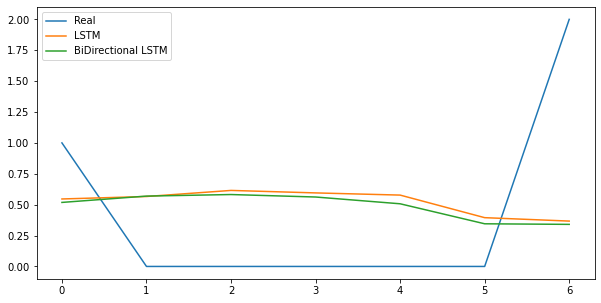

In [302]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [303]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  0.7941804332787579
BiDirectional RMSE :  0.787500970580542


## R03

In [304]:
data = df.loc[:,['R03']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [305]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [306]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 3s 6ms/step - loss: 51.3103
Epoch 2/300
66/66 [==============================] - 0s 6ms/step - loss: 40.0375
Epoch 3/300
66/66 [==============================] - 0s 6ms/step - loss: 39.3398
Epoch 4/300
66/66 [==============================] - 0s 6ms/step - loss: 39.1333
Epoch 5/300
66/66 [==============================] - 0s 6ms/step - loss: 38.9577
Epoch 6/300
66/66 [==============================] - 0s 6ms/step - loss: 38.8850
Epoch 7/300
66/66 [==============================] - 0s 6ms/step - loss: 38.8788
Epoch 8/300
66/66 [==============================] - 0s 6ms/step - loss: 39.0502
Epoch 9/300
66/66 [==============================] - 0s 6ms/step - loss: 38.7032
Epoch 10/300
66/66 [==============================] - 0s 6ms/step - loss: 39.0086
Epoch 11/300
66/66 [==============================] - 0s 6ms/step - loss: 38.9906
Epoch 12/300
66/66 [==============================] - 0s 6ms/step - loss: 38.5805
Epoch 13/300
66/66 [=====

66/66 [==============================] - 0s 6ms/step - loss: 31.4754
Epoch 102/300
66/66 [==============================] - 0s 6ms/step - loss: 32.8062
Epoch 103/300
66/66 [==============================] - 0s 6ms/step - loss: 30.5325
Epoch 104/300
66/66 [==============================] - 0s 6ms/step - loss: 30.0326
Epoch 105/300
66/66 [==============================] - 0s 6ms/step - loss: 29.7089
Epoch 106/300
66/66 [==============================] - 0s 6ms/step - loss: 29.5973
Epoch 107/300
66/66 [==============================] - 0s 6ms/step - loss: 29.5644
Epoch 108/300
66/66 [==============================] - 0s 6ms/step - loss: 29.3264
Epoch 109/300
66/66 [==============================] - 0s 6ms/step - loss: 28.7814
Epoch 110/300
66/66 [==============================] - 0s 6ms/step - loss: 28.9584
Epoch 111/300
66/66 [==============================] - 0s 5ms/step - loss: 29.0094
Epoch 112/300
66/66 [==============================] - 0s 6ms/step - loss: 28.5010
Epoch 113/300
66/6

66/66 [==============================] - 0s 4ms/step - loss: 4.9323
Epoch 299/300
66/66 [==============================] - 0s 4ms/step - loss: 4.8602
Epoch 300/300
66/66 [==============================] - 0s 4ms/step - loss: 4.6733


In [307]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[17.251282, 29.407745, 4.87641, 6.4269657, 7.9411874, -0.062097788, 10.677161]


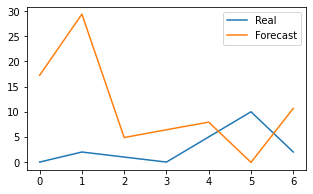

In [308]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [309]:
lstm_rmse = math.sqrt(mean_squared_error(real,lst_output))
print(lstm_rmse)

2.986454381452378


In [325]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=400, verbose=1)

Epoch 1/400
66/66 [==============================] - 2s 3ms/step - loss: 46.7601
Epoch 2/400
66/66 [==============================] - 0s 3ms/step - loss: 40.0196
Epoch 3/400
66/66 [==============================] - 0s 3ms/step - loss: 39.5288
Epoch 4/400
66/66 [==============================] - 0s 3ms/step - loss: 39.1167
Epoch 5/400
66/66 [==============================] - 0s 3ms/step - loss: 39.0299
Epoch 6/400
66/66 [==============================] - 0s 3ms/step - loss: 38.9470
Epoch 7/400
66/66 [==============================] - 0s 3ms/step - loss: 39.0480
Epoch 8/400
66/66 [==============================] - 0s 3ms/step - loss: 38.8629
Epoch 9/400
66/66 [==============================] - 0s 3ms/step - loss: 38.9030
Epoch 10/400
66/66 [==============================] - 0s 3ms/step - loss: 38.8668
Epoch 11/400
66/66 [==============================] - 0s 3ms/step - loss: 39.0878
Epoch 12/400
66/66 [==============================] - 0s 3ms/step - loss: 38.8553
Epoch 13/400
66/66 [=====

66/66 [==============================] - 0s 3ms/step - loss: 30.8124
Epoch 102/400
66/66 [==============================] - 0s 3ms/step - loss: 30.6589
Epoch 103/400
66/66 [==============================] - 0s 3ms/step - loss: 30.7267
Epoch 104/400
66/66 [==============================] - 0s 3ms/step - loss: 30.6874
Epoch 105/400
66/66 [==============================] - 0s 3ms/step - loss: 30.2841
Epoch 106/400
66/66 [==============================] - 0s 3ms/step - loss: 29.9384
Epoch 107/400
66/66 [==============================] - 0s 3ms/step - loss: 29.9676
Epoch 108/400
66/66 [==============================] - 0s 3ms/step - loss: 29.6498
Epoch 109/400
66/66 [==============================] - 0s 3ms/step - loss: 29.7335
Epoch 110/400
66/66 [==============================] - 0s 3ms/step - loss: 29.5644
Epoch 111/400
66/66 [==============================] - 0s 3ms/step - loss: 29.3015
Epoch 112/400
66/66 [==============================] - 0s 3ms/step - loss: 29.0319
Epoch 113/400
66/6

66/66 [==============================] - 0s 3ms/step - loss: 7.8057
Epoch 299/400
66/66 [==============================] - 0s 3ms/step - loss: 7.7342
Epoch 300/400
66/66 [==============================] - 0s 3ms/step - loss: 7.7143
Epoch 301/400
66/66 [==============================] - 0s 3ms/step - loss: 8.0658
Epoch 302/400
66/66 [==============================] - 0s 3ms/step - loss: 7.8520
Epoch 303/400
66/66 [==============================] - 0s 3ms/step - loss: 7.3040
Epoch 304/400
66/66 [==============================] - 0s 3ms/step - loss: 7.4466
Epoch 305/400
66/66 [==============================] - 0s 3ms/step - loss: 7.5493
Epoch 306/400
66/66 [==============================] - 0s 3ms/step - loss: 7.6124
Epoch 307/400
66/66 [==============================] - 0s 3ms/step - loss: 7.7821
Epoch 308/400
66/66 [==============================] - 0s 3ms/step - loss: 8.2541
Epoch 309/400
66/66 [==============================] - 0s 3ms/step - loss: 7.7866
Epoch 310/400
66/66 [=========

66/66 [==============================] - 0s 3ms/step - loss: 4.3448
Epoch 399/400
66/66 [==============================] - 0s 3ms/step - loss: 4.0933
Epoch 400/400
66/66 [==============================] - 0s 3ms/step - loss: 3.8462


In [326]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[17.191002, 11.388608, 0.5892556, 5.7238407, -2.436117, 7.078809, 16.605951]


In [327]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

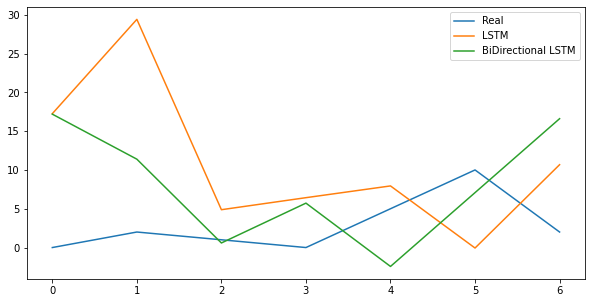

In [328]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [329]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  2.986454381452378
BiDirectional RMSE :  9.955404678227568


## R06 

In [330]:
data = df.loc[:,['R06']]
timeseries_data = data[:-7]
real = data[-7:]
timeseries_data = np.asarray(timeseries_data)
real = np.asarray(real)

In [331]:
n_steps = 5
x, y = prepare_data(timeseries_data, n_steps)
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [332]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 2s 5ms/step - loss: 6.7794
Epoch 2/300
66/66 [==============================] - 0s 4ms/step - loss: 4.4477
Epoch 3/300
66/66 [==============================] - 0s 4ms/step - loss: 4.4159
Epoch 4/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3956
Epoch 5/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3802
Epoch 6/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3735
Epoch 7/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3643
Epoch 8/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3591
Epoch 9/300
66/66 [==============================] - 0s 5ms/step - loss: 4.3802
Epoch 10/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3592
Epoch 11/300
66/66 [==============================] - 0s 5ms/step - loss: 4.4651
Epoch 12/300
66/66 [==============================] - 0s 4ms/step - loss: 4.3645
Epoch 13/300
66/66 [=================

66/66 [==============================] - 0s 5ms/step - loss: 3.5345
Epoch 202/300
66/66 [==============================] - 0s 4ms/step - loss: 3.4932
Epoch 203/300
66/66 [==============================] - 0s 4ms/step - loss: 3.4662
Epoch 204/300
66/66 [==============================] - 0s 4ms/step - loss: 3.4384
Epoch 205/300
66/66 [==============================] - 0s 4ms/step - loss: 3.4395
Epoch 206/300
66/66 [==============================] - 0s 5ms/step - loss: 3.4007
Epoch 207/300
66/66 [==============================] - 0s 5ms/step - loss: 3.3927
Epoch 208/300
66/66 [==============================] - 0s 4ms/step - loss: 3.4228
Epoch 209/300
66/66 [==============================] - 0s 4ms/step - loss: 3.4169
Epoch 210/300
66/66 [==============================] - 0s 4ms/step - loss: 3.3673
Epoch 211/300
66/66 [==============================] - 0s 4ms/step - loss: 3.3333
Epoch 212/300
66/66 [==============================] - 0s 4ms/step - loss: 3.3133
Epoch 213/300
66/66 [=========

In [333]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
lstm_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lstm_output.append(yhat[0][0])
        i=i+1
    

print(lstm_output)

[2.1936975, 2.0288937, 2.5826154, 3.2275496, 3.5370173, 4.1180334, 5.077439]


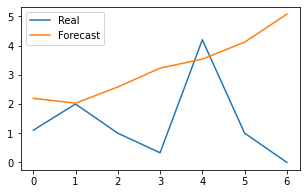

In [334]:
fig = plt.figure(figsize=(5,3))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='Forecast')
plt.legend()

In [335]:
lstm_rmse = math.sqrt(mean_squared_error(real,lstm_output))
print(lstm_rmse)

2.619692927182465


In [336]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'),input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
66/66 [==============================] - 3s 3ms/step - loss: 8.1682
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 4.5705
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3816
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3702
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3786
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3600
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3485
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3605
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3428
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3462
Epoch 11/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3636
Epoch 12/300
66/66 [==============================] - 0s 3ms/step - loss: 4.3866
Epoch 13/300
66/66 [=================

66/66 [==============================] - 0s 3ms/step - loss: 3.2908
Epoch 203/300
66/66 [==============================] - 0s 3ms/step - loss: 3.3138
Epoch 204/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2868
Epoch 205/300
66/66 [==============================] - 0s 3ms/step - loss: 3.3028
Epoch 206/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2704
Epoch 207/300
66/66 [==============================] - 0s 3ms/step - loss: 3.3132
Epoch 208/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2896
Epoch 209/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2851
Epoch 210/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2430
Epoch 211/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2572
Epoch 212/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2301
Epoch 213/300
66/66 [==============================] - 0s 3ms/step - loss: 3.2402
Epoch 214/300
66/66 [=========

In [337]:
x_input =np.asarray(x[-1:]).reshape(n_steps)
temp_input=list(x_input)
bi_output=[]
i=0
while(i<7):
    
    if(len(temp_input)>n_steps):
        x_input=np.asarray(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        bi_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        bi_output.append(yhat[0][0])
        i=i+1
    

print(bi_output)

[1.8960114, 2.5585709, 2.019077, 2.2080677, 2.4116094, 2.183838, 2.2583606]


In [338]:
bi_rmse = math.sqrt(mean_squared_error(real,bi_output))

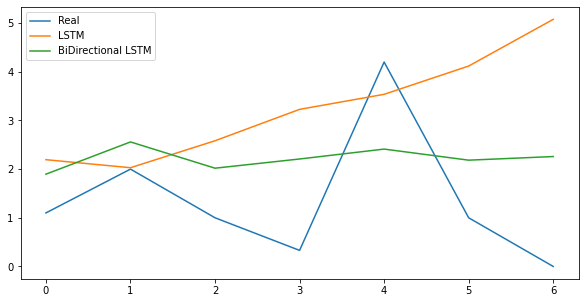

In [339]:
fig = plt.figure(figsize=(10,5))
plt.plot(real,label='Real')
plt.plot(lstm_output,label='LSTM')
plt.plot(bi_output,label='BiDirectional LSTM')
plt.legend()

In [340]:
print("LSTM RMSE          : ",lstm_rmse)
print("BiDirectional RMSE : ",bi_rmse)

LSTM RMSE          :  2.619692927182465
BiDirectional RMSE :  1.4741243123650971
